In [ ]:
# Imports

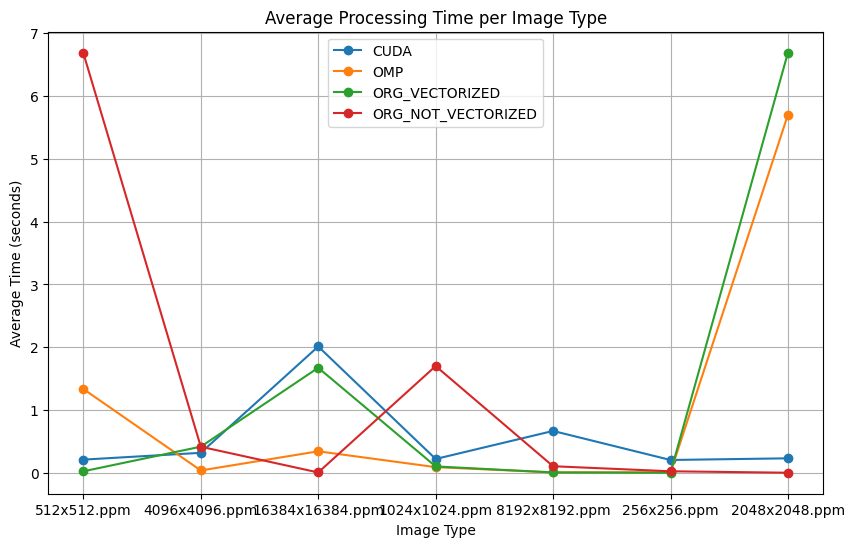

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Define the paths
results_folder = '../results'
csv_suffixes = ["CUDA", "OMP", "ORG_VECTORIZED", "ORG_NOT_VECTORIZED"]

# Initialize a dictionary to hold the data
data = {suffix: [] for suffix in csv_suffixes}
image_types = []

# Load the data from the CSV files
for suffix in csv_suffixes:
    for file_name in os.listdir(results_folder):
        if file_name.endswith(f"_{suffix}_timing_results.csv"):
            # Extract the image type from the file name
            image_type = file_name.split('_')[0]
            if image_type not in image_types:
                image_types.append(image_type)
            
            # Read the CSV file
            csv_path = os.path.join(results_folder, file_name)
            df = pd.read_csv(csv_path, header=None, names=['wall_time', 'cpu_time'])
            
            # Calculate the average wall time
            avg_wall_time = df['wall_time'].mean() / 1000  # Convert milliseconds to seconds
            
            # Store the result
            data[suffix].append(avg_wall_time)

# Create a DataFrame for plotting
plot_data = pd.DataFrame(data, index=image_types)

# Plot the results
plt.figure(figsize=(10, 6))
for suffix in csv_suffixes:
    plt.plot(plot_data.index, plot_data[suffix], marker='o', label=suffix)

plt.xlabel('Image Type')
plt.ylabel('Average Time (seconds)')
plt.title('Average Processing Time per Image Type')
plt.legend()
plt.grid(True)
plt.show()
